In [1]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [2]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11417274850660260109
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
locality {
  bus_id: 1
}
incarnation: 9261963893169461453
physical_device_desc: "device: 0, name: METAL, pci bus id: <undefined>"
xla_global_id: -1
]
Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [3]:
len(tf.config.experimental.list_physical_devices('GPU'))

1

In [4]:
len(tf.config.experimental.list_logical_devices('GPU'))

1

In [5]:
len(tf.config.experimental.list_physical_devices('CPU'))

1

In [6]:
len(tf.config.experimental.list_logical_devices('CPU'))

1

In [7]:
from keras import backend as K

config = tf.compat.v1.ConfigProto( device_count = {'GPU': 1 , 'CPU': 8} ) #max: 1 gpu, 8 cpu sessions
sess = tf.compat.v1.Session(config=config)
K.set_session(sess)

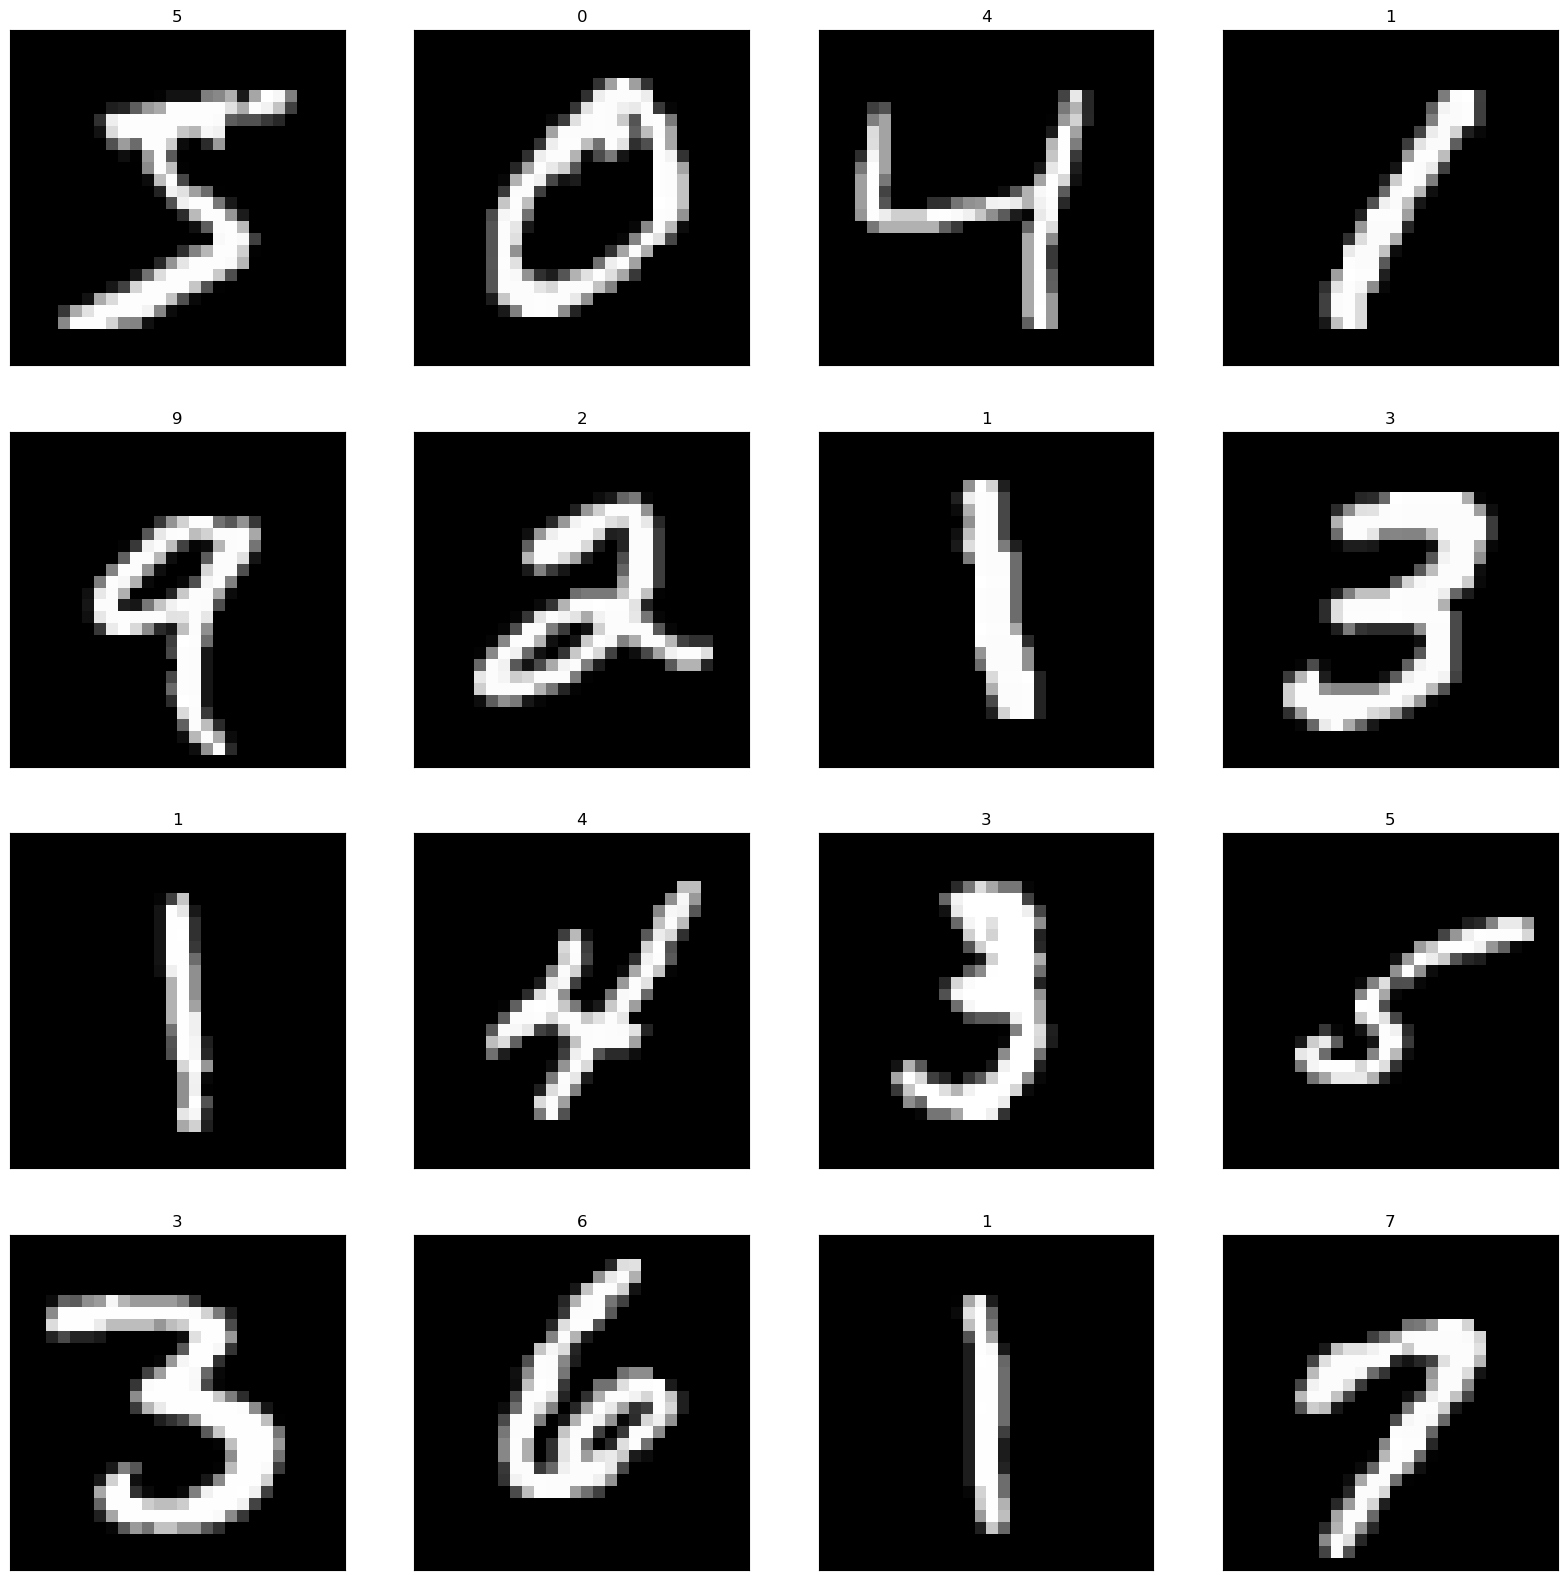

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

fig = plt.figure(figsize=(20,20))
for i in range(16):
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

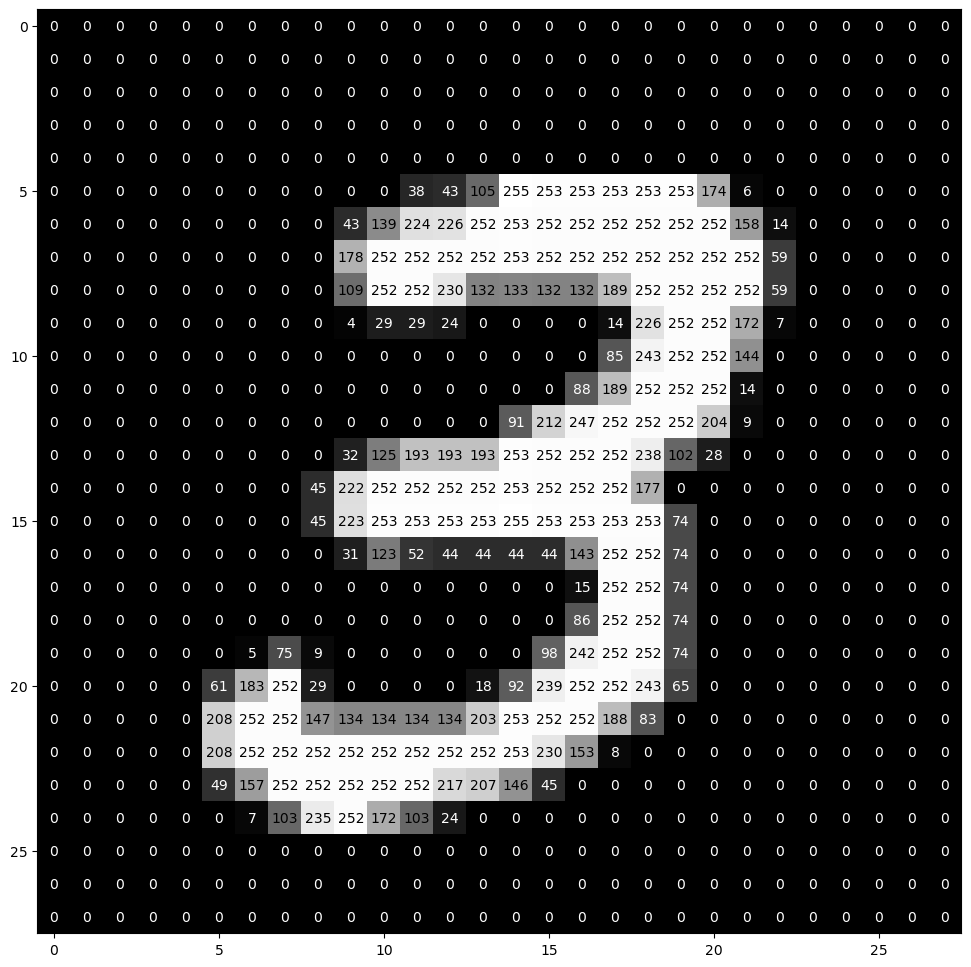

In [9]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y], 2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize= (12, 12))
ax = fig.add_subplot(111)
visualize_input(X_train[7], ax)

In [10]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [11]:
from keras.utils import np_utils

num_classes = len(np.unique(y_train))

print(y_train[:3])

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

print(y_train[:3])

[5 0 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [12]:
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print(input_shape)
print(X_train.shape)

(28, 28, 1)
(60000, 28, 28, 1)


In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape= (28,28,1), padding= 'same'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding= 'same'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                2

In [14]:
model.compile(loss= 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [15]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', verbose=1, save_best_only=True)

hist = model.fit(X_train, y_train, batch_size= 32, epochs= 12, validation_data= (X_test, y_test), callbacks=[checkpointer], verbose=2, shuffle=True)

Epoch 1/12


2023-04-15 18:15:46.817371: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz



Epoch 1: val_loss improved from inf to 0.05324, saving model to mnist.model.best.hdf5
1875/1875 - 21s - loss: 0.1381 - accuracy: 0.9578 - val_loss: 0.0532 - val_accuracy: 0.9825 - 21s/epoch - 11ms/step
Epoch 2/12

Epoch 2: val_loss improved from 0.05324 to 0.03360, saving model to mnist.model.best.hdf5
1875/1875 - 20s - loss: 0.0457 - accuracy: 0.9861 - val_loss: 0.0336 - val_accuracy: 0.9890 - 20s/epoch - 11ms/step
Epoch 3/12

Epoch 3: val_loss did not improve from 0.03360
1875/1875 - 20s - loss: 0.0308 - accuracy: 0.9905 - val_loss: 0.0401 - val_accuracy: 0.9872 - 20s/epoch - 11ms/step
Epoch 4/12

Epoch 4: val_loss improved from 0.03360 to 0.02967, saving model to mnist.model.best.hdf5
1875/1875 - 21s - loss: 0.0224 - accuracy: 0.9928 - val_loss: 0.0297 - val_accuracy: 0.9908 - 21s/epoch - 11ms/step
Epoch 5/12

Epoch 5: val_loss did not improve from 0.02967
1875/1875 - 20s - loss: 0.0174 - accuracy: 0.9941 - val_loss: 0.0316 - val_accuracy: 0.9900 - 20s/epoch - 11ms/step
Epoch 6/12


In [16]:
model.load_weights('mnist.model.best.hdf5')

In [17]:
score = model.evaluate(X_test, y_test, verbose=0)


In [18]:
score

[0.029200101271271706, 0.9912999868392944]

In [19]:
accuracy = 100 * score[1]

print('The final accuracy is %.2f%%' % accuracy)

The final accuracy is 99.13%
